# Content List

## 1. Import Libraries

## 2. Import Data

## 3. Data Cleaning
### 3.1 Missing Values
### 3.2 Duplicates Check
### 3.3 Extreme Values Check

## 4. Regression Analysis: Hypothesis 3
### 4.1 Data Prep for Regression Analysis

## 5. Information & Research vs. Media & Entertainment
### 5.1 Regression Analysis

## 6. Information & Research vs. E-commerce & Services
### 6.1 Regression Analysis

## 7. Information & Research vs. Personal Communication
### 7.1 Regression Analysis

## 8. Information & Research vs. Work & Professional Use
### 8.1 Regression Analysis

## 9. Conclusions


# 1. Import Libraries

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Import Data

In [192]:
# Create path to project folder
path = r'C:\Users\adrig\OneDrive\Documentos\CAREERFOUNDRY\DATA IMMERSION\ACHIEVEMENT 6\Internet use in EU'
path

'C:\\Users\\adrig\\OneDrive\\Documentos\\CAREERFOUNDRY\\DATA IMMERSION\\ACHIEVEMENT 6\\Internet use in EU'

In [193]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'internet_use_act_pp_gdp_act_group_demo_cat.csv'), index_col=0)

In [194]:
df.head()

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group,demographic_group_category
0,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,Internet banking,66.65,40200.0,E-commerce and Services,Other
1,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,civic or political participation,21.21,40200.0,Civic,Other
2,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,sending/receiving e-mails,72.86,40200.0,Personal Communication,Other
3,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,finding information about goods and services,66.88,40200.0,Information and Research,Other
4,daily,"Persons aged 16-74 working in agriculture, for...",Austria,2021,71.67,job search or sending an application,14.11,40200.0,Work and Professional Use,Other


# 3. Data Cleaning

In [195]:
df.columns

Index(['freq_internet_access', 'demographic_group', 'country', 'year',
       'internet_access_rate', 'internet_activities',
       'internet_activities_rate', 'purchasing_power_gdp', 'activity_group',
       'demographic_group_category'],
      dtype='object')

In [196]:
df.shape

(1006934, 10)

## 3.1 Missing Values

In [197]:
# Check for missing values
df.isnull().sum()

freq_internet_access             0
demographic_group                0
country                          0
year                             0
internet_access_rate             0
internet_activities            157
internet_activities_rate       157
purchasing_power_gdp          5985
activity_group                   0
demographic_group_category       0
dtype: int64

In [198]:
# Check for missing values
df[df['internet_activities'].isnull()]

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group,demographic_group_category
22942,daily,Females with low formal education,Italy,2004,5.55,NaN,NaN,24200.0,Other,Gender & Education level
30694,daily,Females with medium formal education,Italy,2004,32.46,NaN,NaN,24200.0,Other,Gender & Education level
38511,daily,Females with high formal education,Italy,2004,52.10,NaN,NaN,24200.0,Other,Gender & Education level
46383,daily,"Females, 16 to 24 years old",Italy,2003,10.70,NaN,NaN,24000.0,Other,Gender & Age
46384,daily,"Females, 16 to 24 years old",Italy,2004,40.20,NaN,NaN,24200.0,Other,Gender & Age
...,...,...,...,...,...,...,...,...,...,...
986230,at least once a week (but not every day),"Individuals, 45 to 54 years old",Italy,2004,1.00,NaN,NaN,24200.0,Other,Other
994151,at least once a week (but not every day),"Individuals, 55 to 64 years old",Italy,2003,4.84,NaN,NaN,24000.0,Other,Other
994152,at least once a week (but not every day),"Individuals, 55 to 64 years old",Italy,2004,0.44,NaN,NaN,24200.0,Other,Other
1001996,at least once a week (but not every day),"Individuals, 65 to 74 years old",Italy,2003,1.85,NaN,NaN,24000.0,Other,Other


In [199]:
df['activity_group'].value_counts()

activity_group
E-commerce and Services      232546
Personal Communication       158278
Information and Research     135517
Media and Entertainment      118814
Social Media                 113299
Learning and Education        84584
Work and Professional Use     84445
Health                        44095
Civic                         35199
Other                           157
Name: count, dtype: int64

I will keep the NaN values for Other, beacuse the rows give valuable information on other aspects rather than activity group. It will not be used for the regression analysis, because I will filter by activity group. 

In [200]:
# Check for missing values
df[df['purchasing_power_gdp'].isnull()]

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group,demographic_group_category
16988,daily,Employees working full time,Kosovo*,2018,89.54,Internet banking,3.19,NaN,E-commerce and Services,Employment Status
16989,daily,Employees working full time,Kosovo*,2018,89.54,sending/receiving e-mails,44.31,NaN,Personal Communication,Employment Status
16990,daily,Employees working full time,Kosovo*,2018,89.54,finding information about goods and services,42.74,NaN,Information and Research,Employment Status
16991,daily,Employees working full time,Kosovo*,2018,89.54,making an appointment with a practitioner via ...,4.85,NaN,Health,Employment Status
16992,daily,Employees working full time,Kosovo*,2018,89.54,telephoning or video calls,91.69,NaN,Personal Communication,Employment Status
...,...,...,...,...,...,...,...,...,...,...
1005856,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,telephoning or video calls,80.77,NaN,Personal Communication,Other
1005857,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,selling goods or services,4.63,NaN,E-commerce and Services,Other
1005858,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,participating in social networks (creating use...,55.40,NaN,Social Media,Other
1005859,at least once a week (but not every day),"Individuals, 65 to 74 years old",Kosovo*,2020,2.80,watching internet streamed TV or videos,51.24,NaN,Media and Entertainment,Other


In [201]:
df['country'].value_counts().dropna()

country
Norway                    33502
Slovakia                  33118
Luxembourg                33006
Hungary                   32770
Cyprus                    32631
Spain                     32630
Sweden                    32575
Greece                    32452
Lithuania                 32443
Denmark                   32176
Latvia                    32119
Poland                    31993
Netherlands               31810
Slovenia                  31641
Czechia                   31529
Belgium                   31479
Estonia                   30714
Finland                   30348
Romania                   30316
Austria                   30072
Germany                   29999
Malta                     29985
Bulgaria                  29897
Ireland                   29330
Portugal                  29249
Italy                     28607
Croatia                   28046
France                    26158
Türkiye                   22920
United Kingdom            20991
Iceland                   20639


I will keep the NaN values for purchasing power, as I will not use this value for the regression analysis. 

## 3.2 Duplicates Check

In [202]:
df_dups = df[df.duplicated()]

In [203]:
df_dups # There are no duplicates

,freq_internet_access,demographic_group,country,year,internet_access_rate,internet_activities,internet_activities_rate,purchasing_power_gdp,activity_group,demographic_group_category


## 3.3 Extreme Values Check

C:\Users\adrig\AppData\Local\Temp\ipykernel_26448\2955743115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['internet_activities_rate'], bins=25)


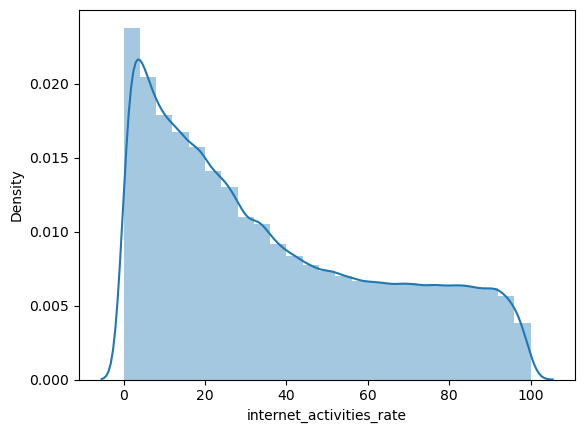

In [204]:
sns.distplot(df['internet_activities_rate'], bins=25)
plt.show() #There are no outliers

C:\Users\adrig\AppData\Local\Temp\ipykernel_26448\3017096968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['internet_access_rate'], bins=25)


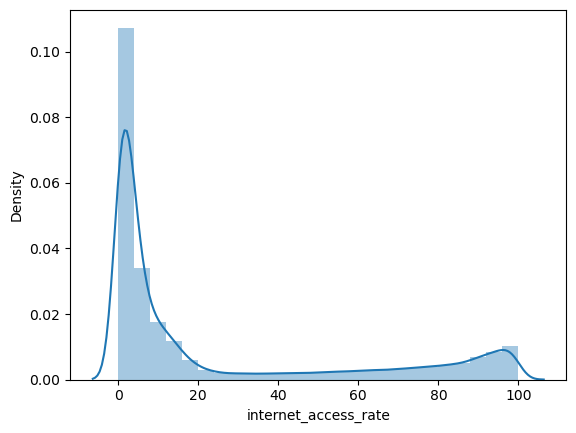

In [205]:
sns.distplot(df['internet_access_rate'], bins=25)
plt.show() #There are no outliers

# 4. Regression Analysis: Hypothesis 3

*H3: Information & Research is positively associated with Media & Entertainment, E-Commerce and Personal Communication.  while Work & Professional Use shows the weakest association to other online activities.*   
Independent variables (X): media and entertainment rates, e-commerce and services rates, personal communication rates, work and professional use rates
Dependent variable (y): information and research rates


## 4.1 Data Prep for Regression Analysis

In [206]:
# Pivot dataframe to have activities as columns
df_pivot = df.pivot_table(index=['country', 'year', 'demographic_group'],
                          columns = 'activity_group',
                          values = 'internet_activities_rate',
                          aggfunc= 'mean').reset_index()

In [207]:
df_pivot.head()

activity_group,country,year,demographic_group,Civic,E-commerce and Services,Health,Information and Research,Learning and Education,Media and Entertainment,Personal Communication,Social Media,Work and Professional Use
0,Albania,2018,All individuals,NaN,1.430,2.28,28.01,NaN,25.91,37.535,48.33,NaN
1,Albania,2018,Employees,NaN,3.210,6.02,40.87,NaN,35.53,53.445,66.32,NaN
2,Albania,2018,Employees working full time,NaN,2.180,4.22,33.11,NaN,28.31,43.920,56.12,NaN
3,Albania,2018,Employees working part time,NaN,1.875,2.48,28.14,NaN,25.87,38.050,55.80,NaN
4,Albania,2018,Females 35 to 44 years old,NaN,1.380,2.32,23.86,NaN,18.99,35.860,43.91,NaN


In [208]:
df_pivot.shape

(26906, 12)

In [209]:
# Checking for missing values
df_pivot.isnull().sum()

activity_group
country                          0
year                             0
demographic_group                0
Civic                        13684
E-commerce and Services          0
Health                       16562
Information and Research         0
Learning and Education        6545
Media and Entertainment       7486
Personal Communication          28
Social Media                  3169
Work and Professional Use     7397
dtype: int64

In [210]:
# Dropping missing values 
df_clean = df_pivot[['Information and Research', 'Media and Entertainment', 'E-commerce and Services', 'Personal Communication', 'Work and Professional Use']].dropna()

In [211]:
df_clean.isnull().sum()

activity_group
Information and Research     0
Media and Entertainment      0
E-commerce and Services      0
Personal Communication       0
Work and Professional Use    0
dtype: int64

In [212]:
df_clean.shape

(11995, 5)

## 5. Information & Research vs. Media & Entertainment

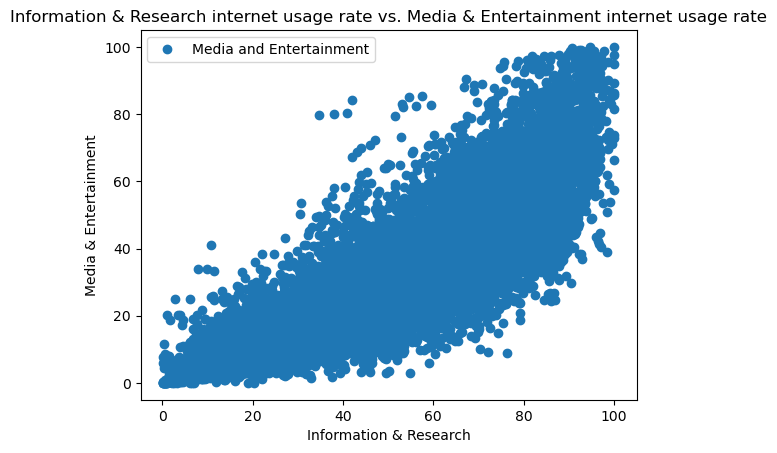

In [213]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x='Information and Research', y='Media and Entertainment', style='o')
plt.title('Information & Research internet usage rate vs. Media & Entertainment internet usage rate')
plt.xlabel('Information & Research')
plt.ylabel('Media & Entertainment')
plt.show()

In [214]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean['Media and Entertainment'].values.reshape(-1,1)
y = df_clean['Information and Research'].values.reshape(-1,1)

In [215]:
X

array([[ 6.565],
       [ 7.145],
       [ 5.67 ],
       ...,
       [38.96 ],
       [80.49 ],
       [64.37 ]])

In [216]:
y

array([[25.88 ],
       [32.715],
       [39.44 ],
       ...,
       [75.72 ],
       [76.24 ],
       [75.99 ]])

In [217]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 5.1 Regression Analysis

In [218]:
# Create a regression object

regression = LinearRegression()

In [219]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [220]:
# Predict the values for y using X

y_predicted = regression.predict(X_test)

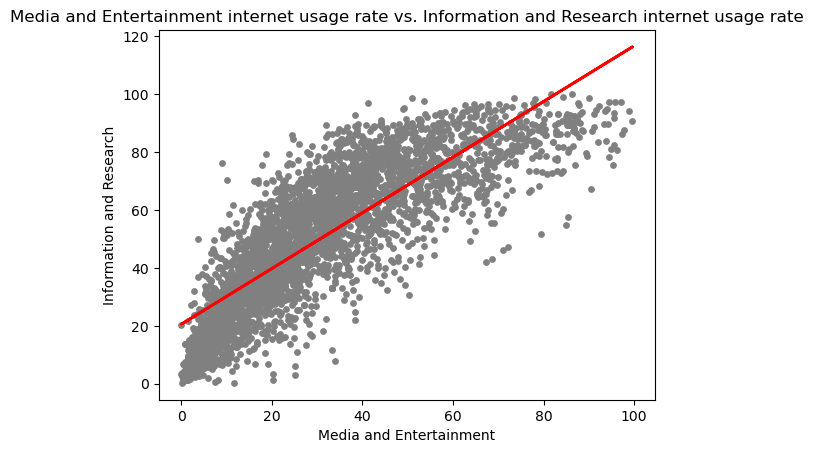

In [221]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=2)
plot_test.title('Media and Entertainment internet usage rate vs. Information and Research internet usage rate')
plot_test.xlabel('Media and Entertainment')
plot_test.ylabel('Information and Research')
plot_test.show()

In [222]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [223]:
# Print the model summary statistics

print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.96095041]]
Mean squared error:  183.3059166210486
R2 score:  0.685306616113589


### Comments on results:
- The slope=0.96 indicates that there is a positive relationship between both variables. 
- The MSE=183 is acceptable given the scale of the data (0-100). 
- The R2=0.68 means that 68% of the variance in Media and Entertainment is explained by Information and Research.

In [224]:
# Create a dataframe comparing the actual and predicted valeues of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,70.600,45.991772
1,76.500,90.099396
2,57.010,47.609372
3,70.000,83.055630
4,58.955,39.188244
5,95.520,95.384624
6,64.375,65.547113
7,21.180,33.768483
8,33.465,26.109708
9,56.155,45.962944


## 6. Information & Research vs. E-commerce & Services

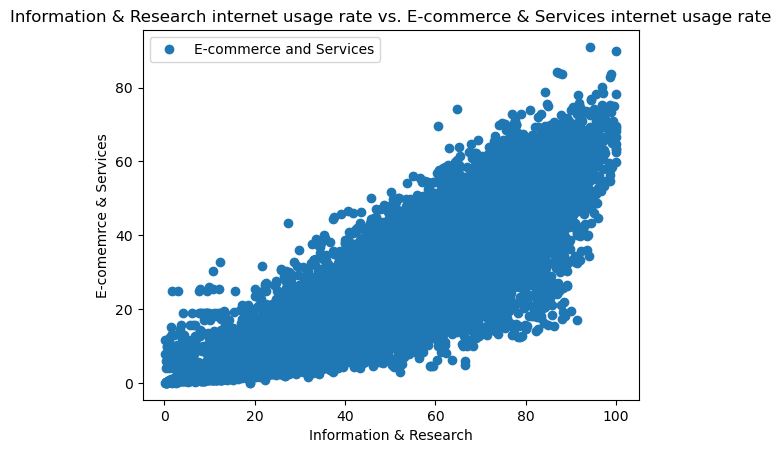

In [225]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x='Information and Research', y='E-commerce and Services', style='o')
plt.title('Information & Research internet usage rate vs. E-commerce & Services internet usage rate')
plt.xlabel('Information & Research')
plt.ylabel('E-comemrce & Services')
plt.show()

In [226]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_clean['E-commerce and Services'].values.reshape(-1,1)
y_2 = df_clean['Information and Research'].values.reshape(-1,1)

In [227]:
X_2

array([[12.15      ],
       [15.99666667],
       [22.31333333],
       ...,
       [28.9125    ],
       [38.7775    ],
       [40.7175    ]])

In [228]:
y_2

array([[25.88 ],
       [32.715],
       [39.44 ],
       ...,
       [75.72 ],
       [76.24 ],
       [75.99 ]])

In [229]:
# Split data into a training set and a test set.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

## 6.1 Regression Analysis

In [230]:
# Create a regression object

regression_2 = LinearRegression()

In [231]:
# Fit the regression object onto the training set

regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [232]:
# Predict the values for y using X

y_predicted_2 = regression_2.predict(X_test_2)

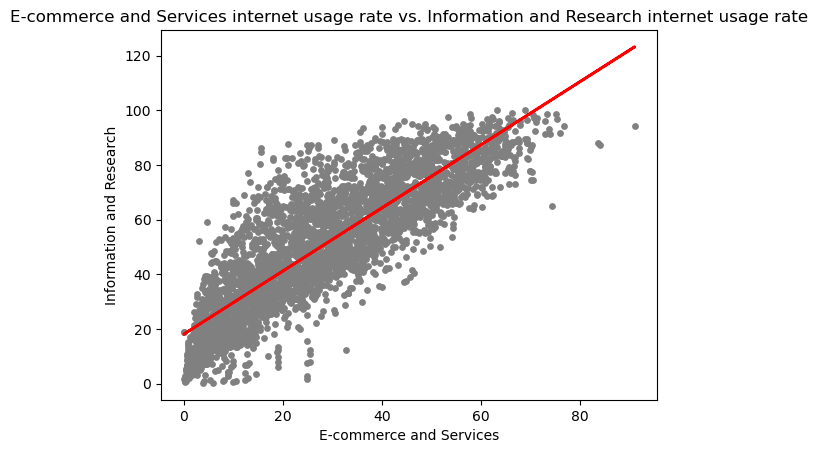

In [233]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth=2)
plot_test.title('E-commerce and Services internet usage rate vs. Information and Research internet usage rate')
plot_test.xlabel('E-commerce and Services')
plot_test.ylabel('Information and Research')
plot_test.show()

In [234]:
# Create objects that contain the model summary statistics

rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [236]:
# Print the model summary statistics

print('Slope: ', regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope:  [[1.15439238]]
Mean squared error:  163.37138678319022
R2 score:  0.7195295411915019


### Comments on results:

- The slope=1.15 indicates that there is a positive relationship between both variables. 
- The MSE=163.37 is acceptable given the scale of the data (0-100). 
- The R2=0.71 means that 71% of the variance in the data is explained by the model.

In [237]:
# Create a dataframe comparing the actual and predicted valeues of y

data_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_2.head(30)

,Actual,Predicted
0,70.600,81.781207
1,76.500,50.403861
2,57.010,59.797729
3,70.000,43.543884
4,58.955,56.746285
5,95.520,94.464132
6,64.375,76.863496
7,21.180,30.052885
8,33.465,45.760317
9,56.155,72.080463


## 7. Information & Research vs. Personal Communication

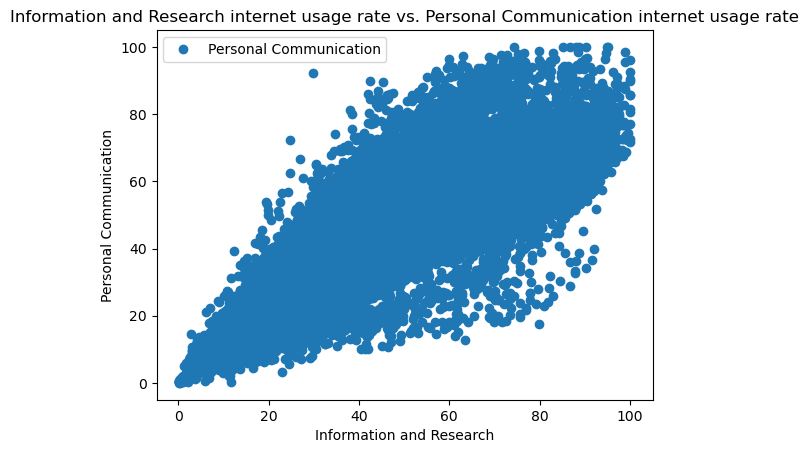

In [238]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x='Information and Research', y='Personal Communication', style='o')
plt.title('Information and Research internet usage rate vs. Personal Communication internet usage rate')
plt.xlabel('Information and Research')
plt.ylabel('Personal Communication')
plt.show()

In [239]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3 = df_clean['Personal Communication'].values.reshape(-1,1)
y_3 = df_clean['Information and Research'].values.reshape(-1,1)

In [240]:
X_3

array([[45.32],
       [55.42],
       [72.16],
       ...,
       [44.48],
       [74.99],
       [59.57]])

In [241]:
y_3

array([[25.88 ],
       [32.715],
       [39.44 ],
       ...,
       [75.72 ],
       [76.24 ],
       [75.99 ]])

In [242]:
# Split data into a training set and a test set.

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

## 7.1 Regression Analysis

In [243]:
# Create a regression object

regression_3 = LinearRegression()

In [244]:
# Fit the regression object onto the training set

regression_3.fit(X_train_3, y_train_3)

LinearRegression()

In [245]:
# Predict the values for y using X

y_predicted_3 = regression_3.predict(X_test_3)

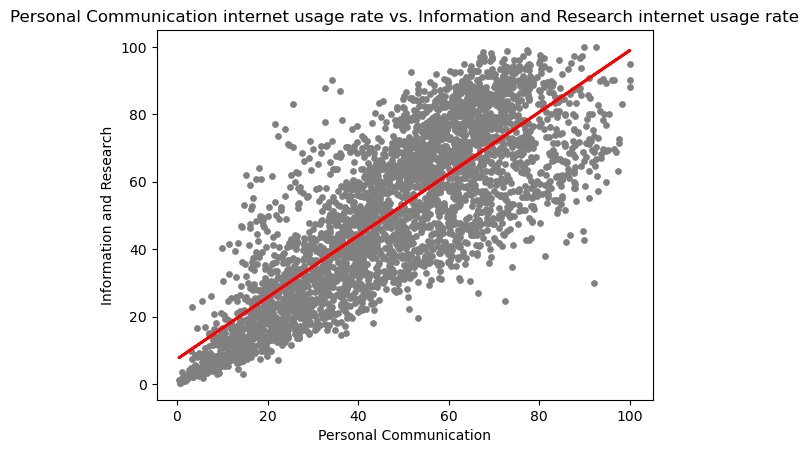

In [246]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth=2)
plot_test.title('Personal Communication internet usage rate vs. Information and Research internet usage rate')
plot_test.xlabel('Personal Communication')
plot_test.ylabel('Information and Research')
plot_test.show()

In [247]:
# Create objects that contain the model summary statistics

rmse_3 = mean_squared_error(y_test_3, y_predicted_3)
r2_3 = r2_score(y_test_3, y_predicted_3)

In [248]:
# Print the model summary statistics

print('Slope: ', regression_3.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope:  [[0.91651729]]
Mean squared error:  207.24111557678225
R2 score:  0.6442154779102006


### Comments on results:
- The slope=0.91 indicates that there is a positive relationship between both variables. 
- The MSE=207 is a little bit high given the scale of the data (0-100). 
- The R2=0.64 means that only 64% of the variance in the data is explained by the model.

In [249]:
# Create a dataframe comparing the actual and predicted valeues of y

data_3 = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data_3.head(30)

,Actual,Predicted
0,70.600,36.448461
1,76.500,67.298433
2,57.010,68.728200
3,70.000,46.250613
4,58.955,63.022880
5,95.520,68.544897
6,64.375,72.114731
7,21.180,35.064520
8,33.465,40.077870
9,56.155,64.241848


## 8. Information & Research vs. Work and Professional Use

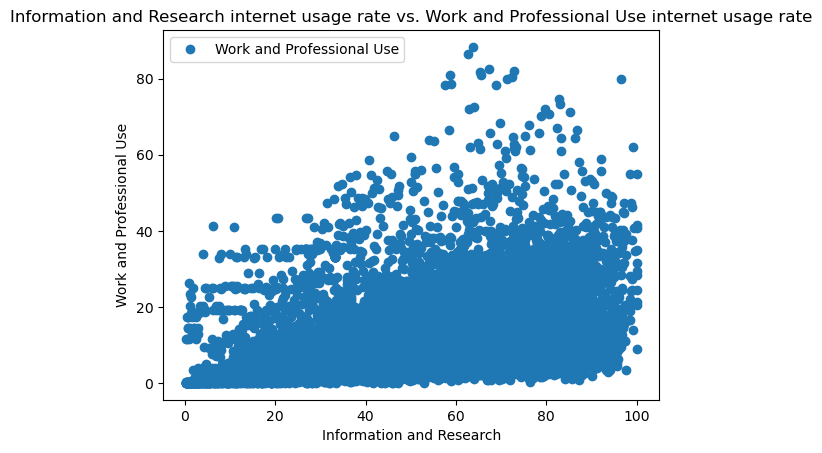

In [250]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x='Information and Research', y='Work and Professional Use', style='o')
plt.title('Information and Research internet usage rate vs. Work and Professional Use internet usage rate')
plt.xlabel('Information and Research')
plt.ylabel('Work and Professional Use')
plt.show()

In [261]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_4 = df_clean['Work and Professional Use'].values.reshape(-1,1)
y_4 = df_clean['Information and Research'].values.reshape(-1,1)

In [262]:
X_4

array([[4.17],
       [3.8 ],
       [7.65],
       ...,
       [2.69],
       [9.78],
       [6.32]])

In [263]:
y_4

array([[25.88 ],
       [32.715],
       [39.44 ],
       ...,
       [75.72 ],
       [76.24 ],
       [75.99 ]])

In [264]:
# Split data into a training set and a test set.

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

## 8.1 Regression Analysis

In [265]:
# Create a regression object

regression_4 = LinearRegression()

In [266]:
# Fit the regression object onto the training set

regression_4.fit(X_train_4, y_train_4)

LinearRegression()

In [267]:
# Predict the values for y using X

y_predicted_4 = regression_4.predict(X_test_4)

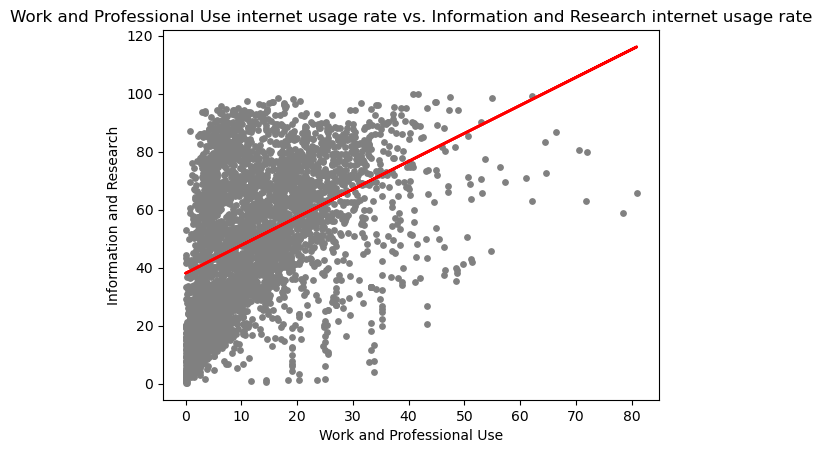

In [268]:
# Create a plot than shows the regression line from the model on the test set. 

plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_test_4, y_predicted_4, color='red', linewidth=2)
plot_test.title('Work and Professional Use internet usage rate vs. Information and Research internet usage rate')
plot_test.xlabel('Work and Professional Use')
plot_test.ylabel('Information and Research')
plot_test.show()

In [269]:
# Create objects that contain the model summary statistics

rmse_4 = mean_squared_error(y_test_4, y_predicted_4)
r2_4 = r2_score(y_test_4, y_predicted_4)

In [270]:
# Print the model summary statistics

print('Slope: ', regression_4.coef_)
print('Mean squared error: ', rmse_4)
print('R2 score: ', r2_4)

Slope:  [[0.96345341]]
Mean squared error:  473.6097534393438
R2 score:  0.18692282988577735


### Comments on results:
- The slope=0.91 indicates that there is a positive relationship between both variables. 
- The MSE=207 is a little bit high given the scale of the data (0-100). 
- The R2=0.64 means that only 64% of the variance in the data is explained by the model.

In [249]:
# Create a dataframe comparing the actual and predicted valeues of y

data_3 = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data_3.head(30)

,Actual,Predicted
0,70.600,36.448461
1,76.500,67.298433
2,57.010,68.728200
3,70.000,46.250613
4,58.955,63.022880
5,95.520,68.544897
6,64.375,72.114731
7,21.180,35.064520
8,33.465,40.077870
9,56.155,64.241848


# 9. Conclusion

Based on the current analysis, the Activities related to E-commerce and Services, Media and Entertainment and Personal Communication, are strongly related to Information and Research. The consistently strong relationships suggests that Information and Research acts as a central driver for digital behavior, meaning that individuals who use the internet for information and research purposes, are also more likely to engage in entertainment, communication and commercial activities. 